In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes2.csv


> **Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import dataset**

In [3]:
df = pd.read_csv("../input/diabetes-dataset/diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Dimensionality check**

In [4]:
df.shape

(768, 9)

**Checking coloumns type within the dataframe**

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Check basic distribution of data**

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Data Exploration**

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

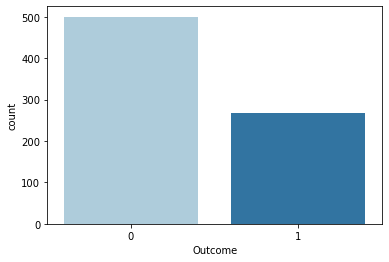

<Figure size 432x288 with 0 Axes>

In [8]:
sns.countplot(x='Outcome',data=df,palette='Paired')
plt.show()
plt.savefig('count_plot')

In [9]:
count_nondisease=len(df[df['Outcome']==0])
count_disease=len(df[df['Outcome']==1])
pct_of_nondisease=count_nondisease/(count_nondisease+count_disease)
print("Percentage of non disease is ",pct_of_nondisease*100)
pct_of_disease=count_disease/(count_nondisease+count_disease)
print("Percentage of disease is ",pct_of_disease*100 )

Percentage of non disease is  65.10416666666666
Percentage of disease is  34.89583333333333


**Checking missing values**

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Consider multiple features and understand the effect of one over other with respect to correlation**

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text major ticklabel objects>)

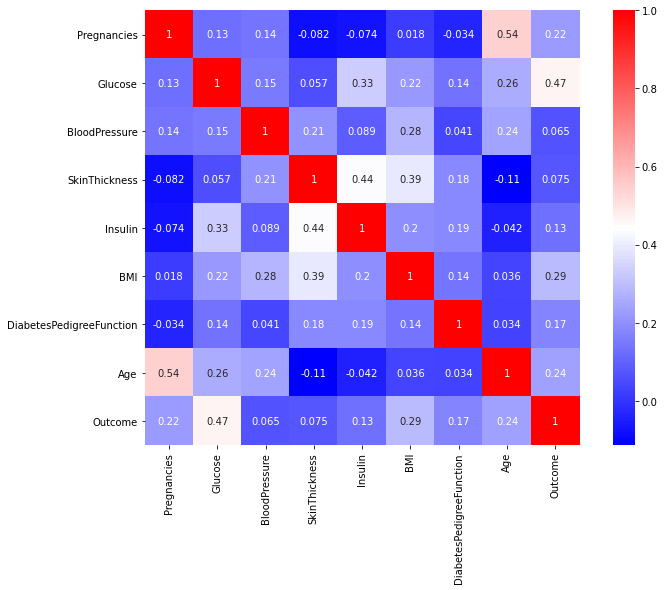

In [41]:
correlations=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=correlations,square=True,annot = True,cmap="bwr")

plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Drop correlated features**

In [13]:
df1=df.drop(['SkinThickness','Insulin','DiabetesPedigreeFunction'],axis=1)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

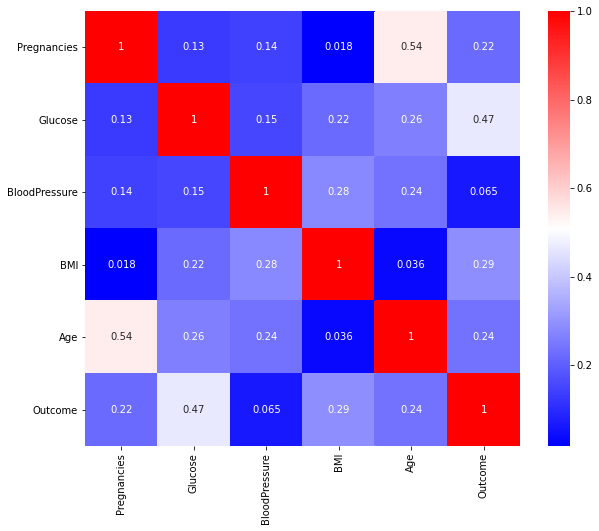

In [42]:
correlations=df1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=correlations,square=True,annot = True,cmap="bwr")

plt.yticks(rotation=0)
plt.xticks(rotation=90)

**Detecting outier**

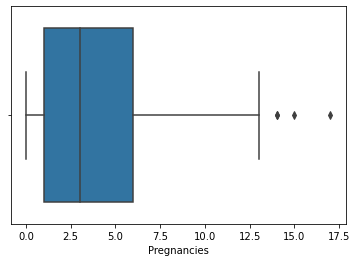

In [15]:
sns.boxplot(x=df1['Pregnancies'])

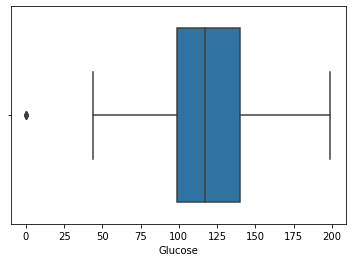

In [16]:
sns.boxplot(x=df1['Glucose'])

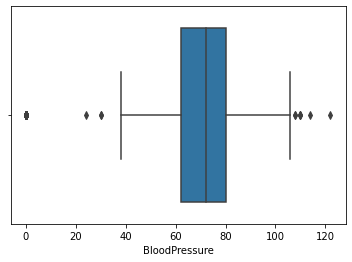

In [17]:
sns.boxplot(x=df1['BloodPressure'])

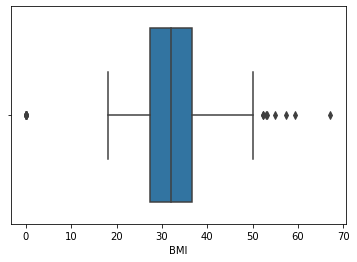

In [18]:
sns.boxplot(x=df1['BMI'])

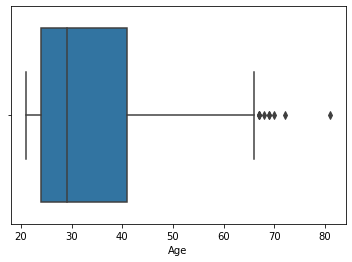

In [19]:
sns.boxplot(x=df1['Age'])

**Outlier treatment**

In [20]:
filter=df1['Pregnancies'].values<13

df2=df1[filter]

df2.shape

(754, 6)

In [21]:
filter=df2['Glucose'].values>20

df2=df2[filter]

df2.shape

(749, 6)

In [22]:
filter=df2['BMI'].values>15
df2=df2[filter]

filter=df2['BMI'].values<65
df2=df2[filter]


df2.shape

(737, 6)

In [23]:
filter= df2['Age'].values<65
df2=df2[filter]

df2.shape

(722, 6)

**Checking outlier**

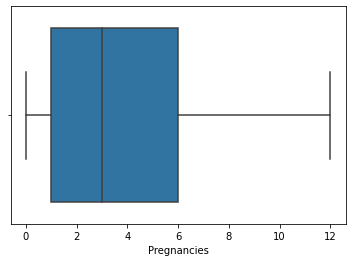

In [24]:
sns.boxplot(x=df2['Pregnancies'])

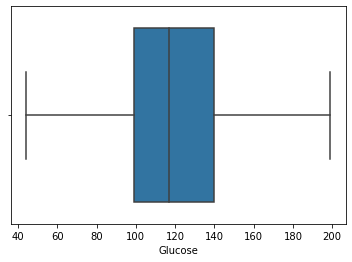

In [25]:
sns.boxplot(x=df2['Glucose'])

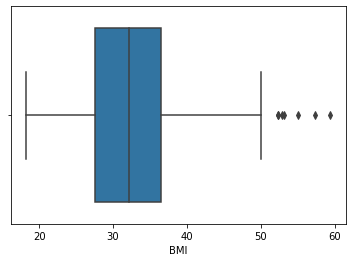

In [26]:
sns.boxplot(x=df2['BMI'])

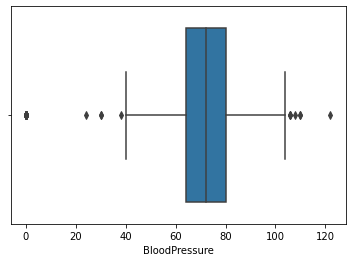

In [27]:
sns.boxplot(x=df2['BloodPressure'])

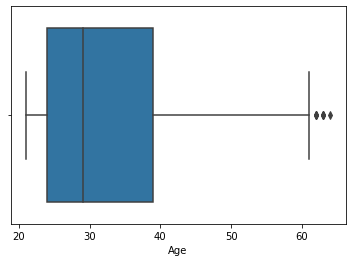

In [28]:
sns.boxplot(x=df2['Age'])

**Split our X & y**

In [29]:
X=df2.drop('Outcome',axis=1)
y=df2['Outcome']

print(X.shape)
print(y.shape)

(722, 5)
(722,)


**Split our data into a training set and a testing set**

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

**Building a logistic regression model**

In [31]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [32]:
logreg.fit(X_train,y_train)

LogisticRegression()

**Evaluating the Logistic Regression model**

In [33]:
y_log_pred=logreg.predict(X_test)

In [34]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
print('Accuracy Score')
print(metrics.accuracy_score(y_test,y_log_pred))

Accuracy Score
0.8110599078341014


In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_log_pred))

[[135  16]
 [ 25  41]]


In [36]:
print(classification_report(y_test,y_log_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       151
           1       0.72      0.62      0.67        66

    accuracy                           0.81       217
   macro avg       0.78      0.76      0.77       217
weighted avg       0.81      0.81      0.81       217



**ROC Curve**

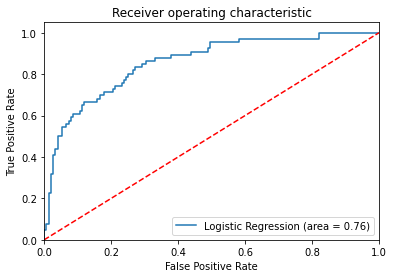

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_log_pred)

0.7576259281557295